In [1]:
# canonical import statements
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
# images (for the discriminator)
X = tf.placeholder(tf.float32, shape=[None, 784])
# noise vector (for the generator)
Z = tf.placeholder(tf.float32, shape=[None, 100])


In [3]:
def xavier(shape):
    return tf.truncated_normal(shape = shape, stddev = 1.0/tf.sqrt(shape[0]/2.0)) #"xavier" initialization of weights

class discriminator_network:
    """MNIST IMAGE(s): x * 784 -> 128 hidden units -> 1 output neuron (probability of being real)"""
    def __init__(self):
        self.d_w1 = tf.Variable(xavier([784,128]))
        self.d_b1 = tf.Variable(tf.zeros(shape=[128]))
        self.d_w2 = tf.Variable(xavier([128,1]))
        self.d_b2 = tf.Variable(tf.zeros(shape=[1]))
    
    def discriminator(self, x):
        """Calculate D(x)"""
        d_hfc_1 = tf.nn.relu(tf.matmul(x, self.d_w1) + self.d_b1)
        d_logit = tf.matmul(d_hfc_1, self.d_w2) + self.d_b2
        d_prob = tf.nn.sigmoid(d_logit)
        return d_prob, d_logit
    
    def get_trainable_vars(self):
        return [self.d_w1, self.d_b1, self.d_w2, self.d_b2]

class generator_network:
    """Random noise vector (100 dim assumed) -> expand to 128 units -> output 784 units (MNIST dim)"""
    def __init__(self):
        self.g_w1 = tf.Variable(xavier([100, 128])) # 100d noise vector assumed. Output 128 hidden units in first layer
        self.g_b1 = tf.Variable(tf.zeros(shape=[128]))
        self.g_w2 = tf.Variable(xavier([128, 784])) # 784 outputs
        self.g_b2 = tf.Variable(tf.zeros(shape=[784]))
    
    def generator(self, z):
        """Calculate and sample G(z)"""
        g_hfc_1 = tf.nn.relu(tf.matmul(z, self.g_w1) + self.g_b1)
        return tf.nn.sigmoid(tf.matmul(g_hfc_1, self.g_w2) + self.g_b2)
    
    def get_trainable_vars(self):
        return [self.g_w1, self.g_b1, self.g_w2, self.g_b2]

In [4]:
# next, we need a function to actually generate a 100d noise vector to feed into our generator
def rand_noise_vector(num_vectors, size):
    return np.random.uniform(-1.0, 1.0, size = [num_vectors, size]) # we might want a bunch of these to generate many imgs


In [5]:
# a function to plot the genned images
def plot(samples, cur_epoch = None):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
        # if epoch is not specified we just overwrite the existing image
        plt.savefig("gan{}".format("" if cur_epoch is None else cur_epoch))
        plt.show()

    return fig

In [6]:
# create networks
gen_net, discriminator_net = generator_network(), discriminator_network()
# compute G(z) where z is the random noise vector 
g_sample = gen_net.generator(z=Z)
# compute d(real) = p(image being real)
_, d_logit_real = discriminator_net.discriminator(X)
# compute d(fake) = p(image being real)
_, d_logit_fake = discriminator_net.discriminator(g_sample)

# optimize wrspt to the real logits, so all tha labels are one since we knew they came from real samples
d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logit_real, labels = tf.ones_like(d_logit_real)))
# optimize wrspt to the fake logits, so all the labels are zero since we knew that they came from fake (generated) samples
d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logit_fake, labels = tf.zeros_like(d_logit_fake)))
# total loss is just the sum
d_loss = d_real_loss + d_fake_loss

# train the generator w/fake logits
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logit_fake, labels = tf.ones_like(d_logit_fake)))

# make sure to only train w/relevant vars
d_step = tf.train.AdamOptimizer().minimize(d_loss, var_list = discriminator_net.get_trainable_vars())
g_step = tf.train.AdamOptimizer().minimize(g_loss, var_list = gen_net.get_trainable_vars())

In [7]:
mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0
Discriminator loss: 1.2924220561981201
Generator loss: 1.752692699432373


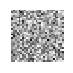

Epoch: 1000
Discriminator loss: 0.0755091980099678
Generator loss: 6.350234031677246


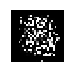

Epoch: 2000
Discriminator loss: 0.17646044492721558
Generator loss: 4.069116592407227


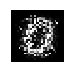

Epoch: 3000
Discriminator loss: 0.5115053653717041
Generator loss: 3.6639199256896973


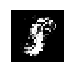

Epoch: 4000
Discriminator loss: 0.5601209998130798
Generator loss: 2.6142477989196777


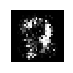

Epoch: 5000
Discriminator loss: 1.2924013137817383
Generator loss: 1.582179069519043


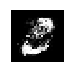

Epoch: 6000
Discriminator loss: 1.1176948547363281
Generator loss: 1.3359616994857788


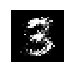

Epoch: 7000
Discriminator loss: 1.343372106552124
Generator loss: 0.9730954170227051


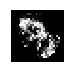

Epoch: 8000
Discriminator loss: 1.2730776071548462
Generator loss: 0.8905339241027832


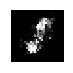

Epoch: 9000
Discriminator loss: 1.2984105348587036
Generator loss: 0.8349612951278687


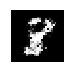

Epoch: 10000
Discriminator loss: 1.2828211784362793
Generator loss: 0.8444031476974487


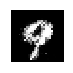

Epoch: 11000
Discriminator loss: 1.0844900608062744
Generator loss: 1.3120057582855225


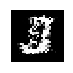

Epoch: 12000
Discriminator loss: 1.2795780897140503
Generator loss: 0.9810125231742859


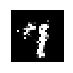

Epoch: 13000
Discriminator loss: 1.3205385208129883
Generator loss: 0.8058595657348633


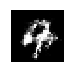

Epoch: 14000
Discriminator loss: 1.2417324781417847
Generator loss: 0.9411064982414246


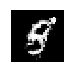

Epoch: 15000
Discriminator loss: 1.1190989017486572
Generator loss: 1.0626490116119385


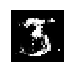

Epoch: 16000
Discriminator loss: 1.2091000080108643
Generator loss: 0.7945353984832764


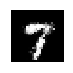

Epoch: 17000
Discriminator loss: 1.2206374406814575
Generator loss: 0.8728547692298889


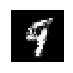

Epoch: 18000
Discriminator loss: 1.2971816062927246
Generator loss: 0.8580269813537598


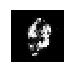

Epoch: 19000
Discriminator loss: 1.2110803127288818
Generator loss: 0.9858442544937134


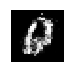

Epoch: 20000
Discriminator loss: 1.229677677154541
Generator loss: 0.9194037914276123


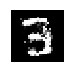

Epoch: 21000
Discriminator loss: 1.2577784061431885
Generator loss: 0.9493288993835449


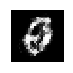

Epoch: 22000
Discriminator loss: 1.046513557434082
Generator loss: 1.06458580493927


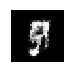

Epoch: 23000
Discriminator loss: 1.1007487773895264
Generator loss: 0.9413713812828064


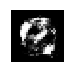

Epoch: 24000
Discriminator loss: 1.202913522720337
Generator loss: 1.052040457725525


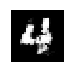

Epoch: 25000
Discriminator loss: 1.2005243301391602
Generator loss: 1.0047587156295776


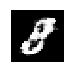

Epoch: 26000
Discriminator loss: 1.0852463245391846
Generator loss: 1.1044340133666992


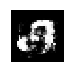

Epoch: 27000
Discriminator loss: 1.0469739437103271
Generator loss: 1.159050703048706


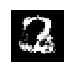

Epoch: 28000
Discriminator loss: 1.052443504333496
Generator loss: 1.0274322032928467


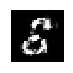

Epoch: 29000
Discriminator loss: 1.0409154891967773
Generator loss: 1.150470495223999


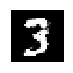

Epoch: 30000
Discriminator loss: 0.994814932346344
Generator loss: 1.2312889099121094


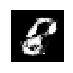

Epoch: 31000
Discriminator loss: 0.9287084341049194
Generator loss: 1.2696715593338013


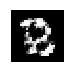

Epoch: 32000
Discriminator loss: 0.983859658241272
Generator loss: 1.178757667541504


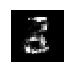

Epoch: 33000
Discriminator loss: 1.0160646438598633
Generator loss: 1.2285003662109375


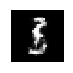

Epoch: 34000
Discriminator loss: 1.0499176979064941
Generator loss: 1.2553892135620117


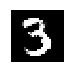

Epoch: 35000
Discriminator loss: 0.9694815278053284
Generator loss: 1.432092308998108


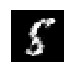

Epoch: 36000
Discriminator loss: 0.9378006458282471
Generator loss: 1.380996823310852


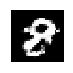

Epoch: 37000
Discriminator loss: 0.9057799577713013
Generator loss: 1.387601613998413


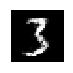

Epoch: 38000
Discriminator loss: 0.8980284929275513
Generator loss: 1.482485055923462


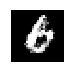

Epoch: 39000
Discriminator loss: 0.9546416997909546
Generator loss: 1.4558582305908203


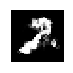

Epoch: 40000
Discriminator loss: 0.8351998329162598
Generator loss: 1.5061349868774414


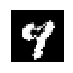

Epoch: 41000
Discriminator loss: 0.9159178733825684
Generator loss: 1.5976665019989014


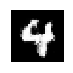

Epoch: 42000
Discriminator loss: 0.8824157118797302
Generator loss: 1.596451759338379


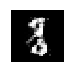

Epoch: 43000
Discriminator loss: 0.940387487411499
Generator loss: 1.6547496318817139


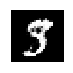

Epoch: 44000
Discriminator loss: 0.8189436197280884
Generator loss: 1.6358327865600586


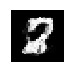

Epoch: 45000
Discriminator loss: 0.8850282430648804
Generator loss: 1.6391265392303467


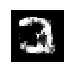

Epoch: 46000
Discriminator loss: 0.7948123216629028
Generator loss: 1.6415963172912598


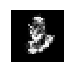

Epoch: 47000
Discriminator loss: 0.8097730278968811
Generator loss: 1.7033019065856934


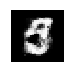

Epoch: 48000
Discriminator loss: 0.7806324362754822
Generator loss: 1.4328038692474365


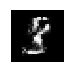

Epoch: 49000
Discriminator loss: 0.6816700100898743
Generator loss: 1.8848066329956055


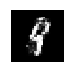

Epoch: 50000
Discriminator loss: 0.8665966987609863
Generator loss: 1.8302266597747803


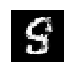

Epoch: 51000
Discriminator loss: 0.8477448225021362
Generator loss: 1.462587833404541


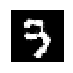

Epoch: 52000
Discriminator loss: 0.9414355754852295
Generator loss: 1.8905301094055176


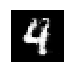

Epoch: 53000
Discriminator loss: 0.6898925304412842
Generator loss: 1.7711219787597656


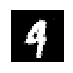

Epoch: 54000
Discriminator loss: 0.6868908405303955
Generator loss: 1.7861400842666626


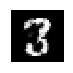

Epoch: 55000
Discriminator loss: 0.815545916557312
Generator loss: 1.792405366897583


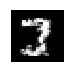

Epoch: 56000
Discriminator loss: 0.7775707244873047
Generator loss: 1.8536577224731445


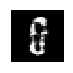

Epoch: 57000
Discriminator loss: 0.7377099990844727
Generator loss: 1.8758625984191895


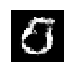

Epoch: 58000
Discriminator loss: 0.7047432661056519
Generator loss: 1.9588648080825806


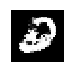

Epoch: 59000
Discriminator loss: 0.715394139289856
Generator loss: 1.8902225494384766


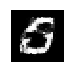

Epoch: 60000
Discriminator loss: 0.8005770444869995
Generator loss: 1.9386802911758423


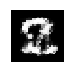

Epoch: 61000
Discriminator loss: 0.684060275554657
Generator loss: 1.7814371585845947


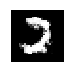

Epoch: 62000
Discriminator loss: 0.8576218485832214
Generator loss: 1.9312800168991089


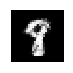

Epoch: 63000
Discriminator loss: 0.6695180535316467
Generator loss: 1.9379355907440186


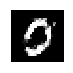

Epoch: 64000
Discriminator loss: 0.6442539691925049
Generator loss: 1.9546741247177124


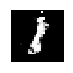

Epoch: 65000
Discriminator loss: 0.8075823783874512
Generator loss: 1.7020351886749268


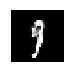

Epoch: 66000
Discriminator loss: 0.6847037076950073
Generator loss: 2.0372886657714844


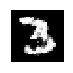

Epoch: 67000
Discriminator loss: 0.6668350696563721
Generator loss: 1.972008228302002


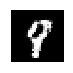

Epoch: 68000
Discriminator loss: 0.6423178911209106
Generator loss: 2.08325457572937


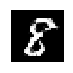

Epoch: 69000
Discriminator loss: 0.736014187335968
Generator loss: 1.9951103925704956


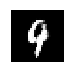

Epoch: 70000
Discriminator loss: 0.6823021173477173
Generator loss: 2.2548131942749023


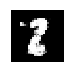

Epoch: 71000
Discriminator loss: 0.584891676902771
Generator loss: 1.9513001441955566


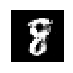

Epoch: 72000
Discriminator loss: 0.6061859130859375
Generator loss: 2.0188207626342773


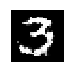

Epoch: 73000
Discriminator loss: 0.5972005128860474
Generator loss: 2.0554394721984863


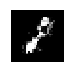

Epoch: 74000
Discriminator loss: 0.7455231547355652
Generator loss: 2.0357110500335693


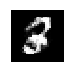

Epoch: 75000
Discriminator loss: 0.6699200868606567
Generator loss: 1.9151108264923096


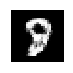

Epoch: 76000
Discriminator loss: 0.6951067447662354
Generator loss: 1.756284475326538


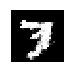

Epoch: 77000
Discriminator loss: 0.675015389919281
Generator loss: 2.1612749099731445


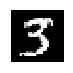

Epoch: 78000
Discriminator loss: 0.59759122133255
Generator loss: 2.2098820209503174


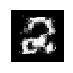

Epoch: 79000
Discriminator loss: 0.5742356777191162
Generator loss: 2.1477699279785156


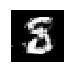

Epoch: 80000
Discriminator loss: 0.6865083575248718
Generator loss: 2.292452335357666


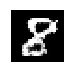

Epoch: 81000
Discriminator loss: 0.5635154843330383
Generator loss: 2.1610405445098877


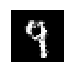

Epoch: 82000
Discriminator loss: 0.6186610460281372
Generator loss: 2.1145877838134766


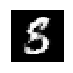

Epoch: 83000
Discriminator loss: 0.6906613111495972
Generator loss: 2.345688819885254


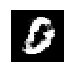

Epoch: 84000
Discriminator loss: 0.760188639163971
Generator loss: 2.4511656761169434


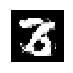

Epoch: 85000
Discriminator loss: 0.7339866161346436
Generator loss: 2.4418327808380127


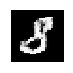

Epoch: 86000
Discriminator loss: 0.6476551294326782
Generator loss: 2.3336918354034424


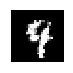

Epoch: 87000
Discriminator loss: 0.6891541481018066
Generator loss: 2.194788694381714


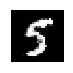

Epoch: 88000
Discriminator loss: 0.7116343379020691
Generator loss: 2.113692283630371


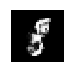

Epoch: 89000
Discriminator loss: 0.5700551867485046
Generator loss: 2.2651429176330566


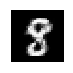

Epoch: 90000
Discriminator loss: 0.5667449235916138
Generator loss: 2.205644130706787


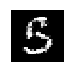

Epoch: 91000
Discriminator loss: 0.7053223252296448
Generator loss: 2.1591949462890625


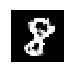

Epoch: 92000
Discriminator loss: 0.63287353515625
Generator loss: 2.208690881729126


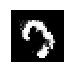

Epoch: 93000
Discriminator loss: 0.6105698347091675
Generator loss: 2.7067184448242188


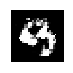

Epoch: 94000
Discriminator loss: 0.662549614906311
Generator loss: 1.9050554037094116


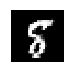

Epoch: 95000
Discriminator loss: 0.5933595299720764
Generator loss: 2.0959434509277344


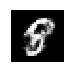

Epoch: 96000
Discriminator loss: 0.548234224319458
Generator loss: 2.0935542583465576


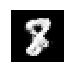

Epoch: 97000
Discriminator loss: 0.7453595399856567
Generator loss: 2.2357418537139893


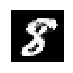

Epoch: 98000
Discriminator loss: 0.5200496912002563
Generator loss: 2.3262863159179688


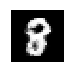

Epoch: 99000
Discriminator loss: 0.6029452085494995
Generator loss: 2.5249595642089844


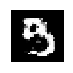

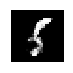

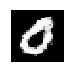

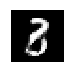

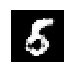

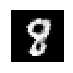

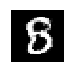

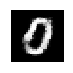

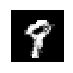

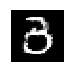

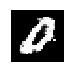

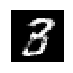

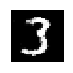

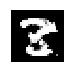

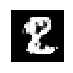

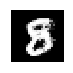

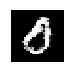

In [9]:
%matplotlib inline
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    i = 0
    for epoch in range(100000): # increase this for more accuracy, but it will be more likely to collapse
        X_mb, _ = mnist.train.next_batch(128)
        _, cur_loss_d = sess.run([d_step, d_loss], feed_dict = {X: X_mb, Z: rand_noise_vector(128, 100)})
        _, cur_loss_g = sess.run([g_step, g_loss], feed_dict = {Z: rand_noise_vector(128, 100)})
        _, cur_loss_g = sess.run([g_step, g_loss], feed_dict = {Z: rand_noise_vector(128, 100)})
        if epoch % 1000 == 0:
            print("Epoch: {}".format(epoch))
            print("Discriminator loss: {}".format(cur_loss_d))
            print("Generator loss: {}".format(cur_loss_g))
            samples = sess.run(g_sample, feed_dict={Z: rand_noise_vector(1, 100)})
            plot(samples, epoch)
    samples = sess.run(g_sample, feed_dict={Z: rand_noise_vector(16, 100)})
    plot(samples) # 16 of em
        



### 